<a href="https://colab.research.google.com/github/ThanikPimpiban/mulitivariate/blob/main/Chapter3_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA (Principle Component Analysis)

1. ปรับ mean และ std ให้มี mean = 0 และ std =1
2. หา covariance matrix ของข้อมูลเรา
3. คำนวณ eigen values-vectors
4. เลือกมาเฉพาะ eigens ที่จำเป็น
5. map data ไปบนแกนใหม่

## PCA step by step 

load data

In [1]:
import pandas as pd

In [2]:
example_df = pd.read_csv('http://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/iris.csv')

In [3]:
example_df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


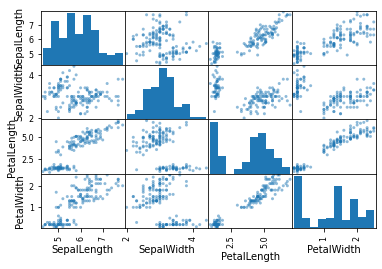

In [4]:
pd.plotting.scatter_matrix(example_df);

In [5]:
import numpy as np

In [6]:
data_matrix = np.array(example_df.iloc[:,:-1])
data_matrix.T

array([[5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
        4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
        5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
        5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
        6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
        6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
        6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
        6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
        6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
        7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
        7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
        6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9],
       [3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
        3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       

In [7]:
print(data_matrix.T.shape)

(4, 150)


**1. ปรับ mean และ std ให้มี mean = 0 และ std =1**

$z = xi-u/variance$

In [8]:
meanD = np.mean(data_matrix.T,axis=1)
meanD

array([5.84333333, 3.054     , 3.75866667, 1.19866667])

In [9]:
std0 = np.std(data_matrix.T,axis=1)
std0

array([0.82530129, 0.43214658, 1.75852918, 0.76061262])

In [10]:
zeromatrix = np.zeros([4,10])
zeromatrix.T

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [11]:
x=zeromatrix.T - meanD   ## reshape บังคับปรับขนาดของ matrix ให้เป็นไปตามที่เราต้องการ  -> zeromatrix - meanD.reshape(4,1)
x.T

array([[-5.84333333, -5.84333333, -5.84333333, -5.84333333, -5.84333333,
        -5.84333333, -5.84333333, -5.84333333, -5.84333333, -5.84333333],
       [-3.054     , -3.054     , -3.054     , -3.054     , -3.054     ,
        -3.054     , -3.054     , -3.054     , -3.054     , -3.054     ],
       [-3.75866667, -3.75866667, -3.75866667, -3.75866667, -3.75866667,
        -3.75866667, -3.75866667, -3.75866667, -3.75866667, -3.75866667],
       [-1.19866667, -1.19866667, -1.19866667, -1.19866667, -1.19866667,
        -1.19866667, -1.19866667, -1.19866667, -1.19866667, -1.19866667]])

## เลื่อน mean มาที่ 0

In [12]:
data_matrixm0 =data_matrix.T - meanD.reshape((4,1))
data_matrixm0 

array([[-7.43333333e-01, -9.43333333e-01, -1.14333333e+00,
        -1.24333333e+00, -8.43333333e-01, -4.43333333e-01,
        -1.24333333e+00, -8.43333333e-01, -1.44333333e+00,
        -9.43333333e-01, -4.43333333e-01, -1.04333333e+00,
        -1.04333333e+00, -1.54333333e+00, -4.33333333e-02,
        -1.43333333e-01, -4.43333333e-01, -7.43333333e-01,
        -1.43333333e-01, -7.43333333e-01, -4.43333333e-01,
        -7.43333333e-01, -1.24333333e+00, -7.43333333e-01,
        -1.04333333e+00, -8.43333333e-01, -8.43333333e-01,
        -6.43333333e-01, -6.43333333e-01, -1.14333333e+00,
        -1.04333333e+00, -4.43333333e-01, -6.43333333e-01,
        -3.43333333e-01, -9.43333333e-01, -8.43333333e-01,
        -3.43333333e-01, -9.43333333e-01, -1.44333333e+00,
        -7.43333333e-01, -8.43333333e-01, -1.34333333e+00,
        -1.44333333e+00, -8.43333333e-01, -7.43333333e-01,
        -1.04333333e+00, -7.43333333e-01, -1.24333333e+00,
        -5.43333333e-01, -8.43333333e-01,  1.15666667e+0

In [13]:
from matplotlib import pyplot as plt

(array([ 9., 13., 23., 20., 18., 16., 21., 17.,  5.,  2.,  6.]),
 array([4.3       , 4.62727273, 4.95454545, 5.28181818, 5.60909091,
        5.93636364, 6.26363636, 6.59090909, 6.91818182, 7.24545455,
        7.57272727, 7.9       ]),
 <a list of 11 Patch objects>)

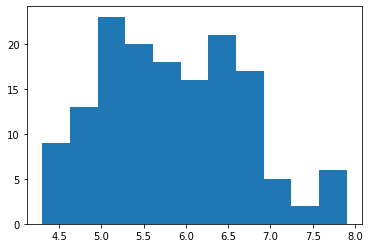

In [14]:
plt.hist(data_matrix.T[0,:],bins= 'rice')

In [15]:
data_matrixm0_std = data_matrix.T/std0.reshape((4,1))

(array([ 9., 13., 23., 20., 18., 16., 21., 17.,  5.,  2.,  6.]),
 array([-1.54333333, -1.21606061, -0.88878788, -0.56151515, -0.23424242,
         0.0930303 ,  0.42030303,  0.74757576,  1.07484848,  1.40212121,
         1.72939394,  2.05666667]),
 <a list of 11 Patch objects>)

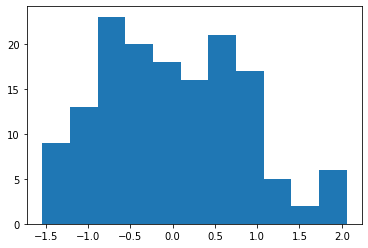

In [16]:
plt.hist(data_matrixm0[0,:],bins= 'rice')

(array([ 9., 13., 23., 20., 18., 16., 21., 17.,  5.,  2.,  6.]),
 array([-1.54333333, -1.21606061, -0.88878788, -0.56151515, -0.23424242,
         0.0930303 ,  0.42030303,  0.74757576,  1.07484848,  1.40212121,
         1.72939394,  2.05666667]),
 <a list of 11 Patch objects>)

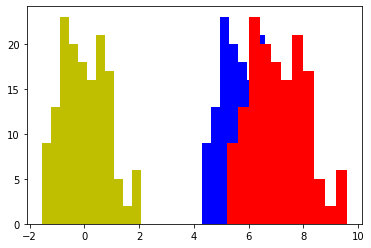

In [17]:
plt.hist(data_matrix.T[0,:],bins= 'rice' , color= 'b')
plt.hist(data_matrixm0_std[0,:], bins= 'rice', color ='r' )
plt.hist(data_matrixm0[0,:],bins= 'rice' , color= 'y')

## วิธีแบบเร็ว

In [18]:
from scipy import  stats

In [19]:
stats.zscore(data_matrix.T,axis=1)

array([[-9.00681170e-01, -1.14301691e+00, -1.38535265e+00,
        -1.50652052e+00, -1.02184904e+00, -5.37177559e-01,
        -1.50652052e+00, -1.02184904e+00, -1.74885626e+00,
        -1.14301691e+00, -5.37177559e-01, -1.26418478e+00,
        -1.26418478e+00, -1.87002413e+00, -5.25060772e-02,
        -1.73673948e-01, -5.37177559e-01, -9.00681170e-01,
        -1.73673948e-01, -9.00681170e-01, -5.37177559e-01,
        -9.00681170e-01, -1.50652052e+00, -9.00681170e-01,
        -1.26418478e+00, -1.02184904e+00, -1.02184904e+00,
        -7.79513300e-01, -7.79513300e-01, -1.38535265e+00,
        -1.26418478e+00, -5.37177559e-01, -7.79513300e-01,
        -4.16009689e-01, -1.14301691e+00, -1.02184904e+00,
        -4.16009689e-01, -1.14301691e+00, -1.74885626e+00,
        -9.00681170e-01, -1.02184904e+00, -1.62768839e+00,
        -1.74885626e+00, -1.02184904e+00, -9.00681170e-01,
        -1.26418478e+00, -9.00681170e-01, -1.50652052e+00,
        -6.58345429e-01, -1.02184904e+00,  1.40150837e+0

**2. หา covariance matrix ของข้อมูลเรา**

covariance matrix $E=1/x-1((X-xbar)^x(X-xbar))$

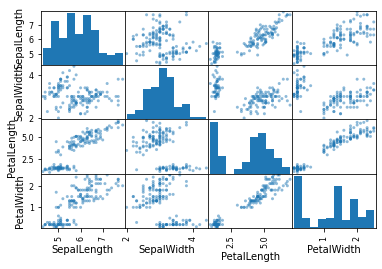

In [20]:
pd.plotting.scatter_matrix(example_df);

In [21]:
data_cov = np.cov(data_matrixm0_std)
data_cov

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

## 1.

In [22]:
meanD=np.mean(data_matrix.T,axis=1)
meanD

array([5.84333333, 3.054     , 3.75866667, 1.19866667])

In [23]:
meanD.shape

(4,)

In [24]:
stdD = np.std(data_matrix.T,axis=1)

 **ขั้นที่ 3**

In [25]:
eigen_values, eigen_vectors = np.linalg.eig(data_cov)

In [26]:
eigen_values



array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

In [27]:
eigen_vectors

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

**คำนวณว่า แต่ละ eigen vector อธิบายข้อมูลทั้งหมด ได้ดีแค่ไหน**

In [28]:
variance_explained = []
for i in eigen_values :
          variance_explained.append((i/sum(eigen_values))*100)

print(variance_explained)

[72.77045209380132, 23.030523267680632, 3.6838319576273815, 0.5151926808906417]


In [29]:
cumulative_variance_explained= np.cumsum(variance_explained)
print(cumulative_variance_explained)

[ 72.77045209  95.80097536  99.48480732 100.        ]


In [30]:
#selected_eigen_vectors

**ขั้น 5**

$Xpca = X.W$

In [31]:
x = data_matrixm0_std
x.shape

(4, 150)

In [33]:
#w = selected_eigen_vectors
#w

**PCA**

In [ ]:
### import

In [ ]:
from sklearn.decomposition import  PCA

In [ ]:
#### Define

In [ ]:
pca = PCA(n_components=2)

In [ ]:
### Fit-Transform

##Example##

In [35]:
import pandas as pd

In [37]:
ex1 = pd.read_csv('/content/nndb_flat.csv')
ex1

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.17,0.0,2.32,3,0.042,0.034,0.005,24,0.000,0.02,2,0.000,24,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.13,0.0,2.32,3,0.042,0.034,0.005,24,0.016,0.16,2,0.004,23,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876,0.28,99.48,0.00,0.00,0.0,840,0.001,0.01,0.0,2.80,0,0.003,0.005,0.001,4,0.001,0.00,0,0.000,3,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353,21.40,28.74,2.34,0.50,0.0,198,0.166,1.22,0.0,0.25,36,1.016,0.382,0.029,528,0.040,0.31,23,0.009,387,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371,23.24,29.68,2.79,0.51,0.0,292,0.065,1.26,0.0,0.26,20,0.118,0.351,0.014,674,0.024,0.43,24,0.012,451,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,83110,Finfish and Shellfish Products,"MACKEREL,SALTED","Fish, mackerel, salted",NaN,NaN,NaN,305,18.50,25.10,0.00,0.00,0.0,47,0.410,12.00,0.0,2.38,15,3.300,0.190,0.020,66,0.100,1.40,60,0.000,254,73.4,1.10,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,90240,Finfish and Shellfish Products,"SCALLOP,(BAY&SEA),CKD,STMD","Mollusks, scallop, (bay and sea), cooked, steamed",NaN,NaN,NaN,111,20.54,0.84,5.41,0.00,0.0,2,0.112,2.15,0.0,0.00,20,1.076,0.024,0.012,10,0.033,0.58,37,0.029,426,21.7,1.55,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,90480,Sweets,"SYRUP,CANE","Syrup, Cane",NaN,NaN,NaN,269,0.00,0.00,73.14,73.20,0.0,0,0.000,0.00,0.0,0.00,0,0.100,0.060,0.130,13,0.020,3.60,10,0.000,8,0.7,0.19,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90560,Finfish and Shellfish Products,"SNAIL,RAW","Mollusks, snail, raw",NaN,NaN,NaN,90,16.10,1.40,2.00,0.00,0.0,30,0.130,0.50,0.0,5.00,6,1.400,0.120,0.010,10,0.400,3.50,250,0.000,272,27.4,1.00,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


**ลอง plot scatter matirx**

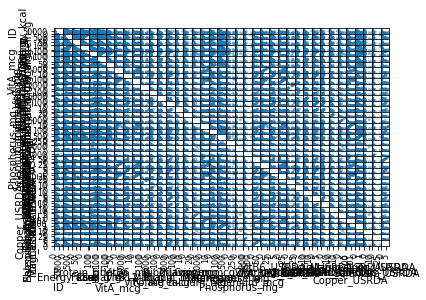

In [38]:
pd.plotting.scatter_matrix(ex1);

**ตรวจสออบขนาดข้อมูลว่ามี data กี่ตัวและมีกี่ dimension**

In [39]:
ex1.shape

(8618, 45)

**เนื่องจาก data มี dimension มากเกินไป เราจะทดสอบดูว่า column ใดให้ข้อมูลซ้ำกับ column อื่น แล้วลบมันออก**

In [40]:
new_ex1 = ex1.iloc[:,7:]   ## เลือกเฉพาะข้อมูลที่เป็นตัวเลข
new_ex1.head()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.17,0.0,2.32,3,0.042,0.034,0.005,24,0.000,0.02,2,0.000,24,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.13,0.0,2.32,3,0.042,0.034,0.005,24,0.016,0.16,2,0.004,23,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876,0.28,99.48,0.00,0.00,0.0,840,0.001,0.01,0.0,2.80,0,0.003,0.005,0.001,4,0.001,0.00,0,0.000,3,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353,21.40,28.74,2.34,0.50,0.0,198,0.166,1.22,0.0,0.25,36,1.016,0.382,0.029,528,0.040,0.31,23,0.009,387,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371,23.24,29.68,2.79,0.51,0.0,292,0.065,1.26,0.0,0.26,20,0.118,0.351,0.014,674,0.024,0.43,24,0.012,451,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


**ตรวจสอบว่าระหว่าง column มี correlation กันมากน้อยแค่ไหน ด้วย numpy**

In [41]:
import numpy as np


In [54]:
corr = np.corrcoef(new_ex1.to_numpy().T) 

In [55]:
corr.shape

(38, 38)

In [56]:
corr

array([[1.        , 0.11030203, 0.80679472, ..., 0.19518065, 0.05667274,
        0.11276635],
       [0.11030203, 1.        , 0.05471538, ..., 0.44460761, 0.37836917,
        0.41631538],
       [0.80679472, 0.05471538, 1.        , ..., 0.06608644, 0.03755914,
        0.02826352],
       ...,
       [0.19518065, 0.44460761, 0.06608644, ..., 1.        , 0.22368557,
        0.26657694],
       [0.05667274, 0.37836917, 0.03755914, ..., 0.22368557, 1.        ,
        0.20529859],
       [0.11276635, 0.41631538, 0.02826352, ..., 0.26657694, 0.20529859,
        1.        ]])

**ใช้ for**

In [64]:
for i in range(corr.shape[0]):
        for j in range(corr.shape[1]):
            if (i !=j )  and (corr[i,j] == 1.):
                print(f'row = {i} column = {j} corrcoef = {corr[i,j]}')

row = 7 column = 24 corrcoef = 1.0
row = 9 column = 26 corrcoef = 1.0
row = 10 column = 27 corrcoef = 1.0
row = 12 column = 29 corrcoef = 1.0
row = 13 column = 30 corrcoef = 1.0
row = 20 column = 35 corrcoef = 1.0
row = 21 column = 36 corrcoef = 1.0
row = 22 column = 37 corrcoef = 1.0
row = 24 column = 7 corrcoef = 1.0
row = 26 column = 9 corrcoef = 1.0
row = 27 column = 10 corrcoef = 1.0
row = 29 column = 12 corrcoef = 1.0
row = 30 column = 13 corrcoef = 1.0
row = 31 column = 14 corrcoef = 1.0
row = 35 column = 20 corrcoef = 1.0
row = 36 column = 21 corrcoef = 1.0
row = 37 column = 22 corrcoef = 1.0


**เช็คความสัมพันธ์ data**

In [104]:
new_ex1.iloc[:5,10:30]

,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA
0,2.32,3,0.042,0.034,0.005,24,0.000,0.02,2,0.000,24,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625
1,2.32,3,0.042,0.034,0.005,24,0.016,0.16,2,0.004,23,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625
2,2.80,0,0.003,0.005,0.001,4,0.001,0.00,0,0.000,3,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188
3,0.25,36,1.016,0.382,0.029,528,0.040,0.31,23,0.009,387,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500
4,0.26,20,0.118,0.351,0.014,674,0.024,0.43,24,0.012,451,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375


**plot**

In [47]:
import matplotlib.pyplot as plt


**data ที่มี corr เป็น 1 เท่ากัน**

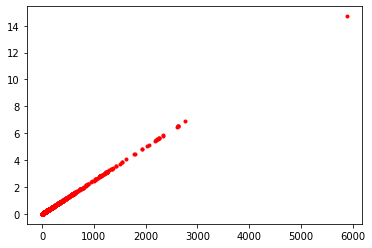

In [48]:
plt.plot(new_ex1.iloc[:,11],new_ex1.iloc[:,28],'r.')

**data ที่มี corr เป็นค่าอื่น**

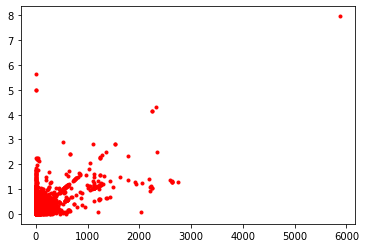

In [49]:
plt.plot(new_ex1.iloc[:,11],new_ex1.iloc[:,29],'r.')

**ลบcolumnซ้ำ**

In [159]:
new_ex1.columns.str.contains('_USRDA')

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [158]:
new_ex1.columns[new_ex1.columns.str.contains('_USRDA')].values

array(['VitA_USRDA', 'VitB6_USRDA', 'VitB12_USRDA', 'VitC_USRDA',
       'VitE_USRDA', 'Folate_USRDA', 'Niacin_USRDA', 'Riboflavin_USRDA',
       'Thiamin_USRDA', 'Calcium_USRDA', 'Copper_USRDA',
       'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA',
       'Zinc_USRDA'], dtype=object)

In [65]:
new_ex1.drop(new_ex1.columns[new_ex1.columns.str.contains('_USRDA')].values,axis=1)

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.17,0.0,2.32,3,0.042,0.034,0.005,24,0.000,0.02,2,0.000,24,1.0,0.09
1,717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.13,0.0,2.32,3,0.042,0.034,0.005,24,0.016,0.16,2,0.004,23,1.0,0.05
2,876,0.28,99.48,0.00,0.00,0.0,840,0.001,0.01,0.0,2.80,0,0.003,0.005,0.001,4,0.001,0.00,0,0.000,3,0.0,0.01
3,353,21.40,28.74,2.34,0.50,0.0,198,0.166,1.22,0.0,0.25,36,1.016,0.382,0.029,528,0.040,0.31,23,0.009,387,14.5,2.66
4,371,23.24,29.68,2.79,0.51,0.0,292,0.065,1.26,0.0,0.26,20,0.118,0.351,0.014,674,0.024,0.43,24,0.012,451,14.5,2.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,305,18.50,25.10,0.00,0.00,0.0,47,0.410,12.00,0.0,2.38,15,3.300,0.190,0.020,66,0.100,1.40,60,0.000,254,73.4,1.10
8614,111,20.54,0.84,5.41,0.00,0.0,2,0.112,2.15,0.0,0.00,20,1.076,0.024,0.012,10,0.033,0.58,37,0.029,426,21.7,1.55
8615,269,0.00,0.00,73.14,73.20,0.0,0,0.000,0.00,0.0,0.00,0,0.100,0.060,0.130,13,0.020,3.60,10,0.000,8,0.7,0.19
8616,90,16.10,1.40,2.00,0.00,0.0,30,0.130,0.50,0.0,5.00,6,1.400,0.120,0.010,10,0.400,3.50,250,0.000,272,27.4,1.00


### Quiz1 ลบ column ที่มีค่า corraletion เป็น 1 เมื่อเทียบกับ column อื่น

In [75]:
new_ex1.columns.str.contains('_mg')

array([False, False, False, False, False, False, False,  True, False,
        True,  True, False,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [76]:
new_ex1.columns[new_ex1.columns.str.contains('_mg')].values

array(['VitB6_mg', 'VitC_mg', 'VitE_mg', 'Niacin_mg', 'Riboflavin_mg',
       'Thiamin_mg', 'Calcium_mg', 'Iron_mg', 'Magnesium_mg',
       'Manganese_mg', 'Phosphorus_mg', 'Zinc_mg'], dtype=object)

In [78]:
new_ex1.drop(new_ex1.columns[new_ex1.columns.str.contains('_mg')].values,axis=1)

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB12_mcg,Folate_mcg,Copper_mcg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717,0.85,81.11,0.06,0.06,0.0,684,0.17,3,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717,0.85,81.11,0.06,0.06,0.0,684,0.13,3,0.016,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876,0.28,99.48,0.00,0.00,0.0,840,0.01,0,0.001,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353,21.40,28.74,2.34,0.50,0.0,198,1.22,36,0.040,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371,23.24,29.68,2.79,0.51,0.0,292,1.26,20,0.024,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,305,18.50,25.10,0.00,0.00,0.0,47,12.00,15,0.100,73.4,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,111,20.54,0.84,5.41,0.00,0.0,2,2.15,20,0.033,21.7,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,269,0.00,0.00,73.14,73.20,0.0,0,0.00,0,0.020,0.7,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90,16.10,1.40,2.00,0.00,0.0,30,0.50,6,0.400,27.4,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


**เฉลย**

In [161]:
new_ex1.drop(['VitE_mg','Niacin_mg','Riboflavin_mg','Thiamin_mg','Magnesium_mg','Phosphorus_mg','Zinc_mg'],axis=1)

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.17,0.0,3,24,0.000,0.02,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.13,0.0,3,24,0.016,0.16,0.004,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876,0.28,99.48,0.00,0.00,0.0,840,0.001,0.01,0.0,0,4,0.001,0.00,0.000,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353,21.40,28.74,2.34,0.50,0.0,198,0.166,1.22,0.0,36,528,0.040,0.31,0.009,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371,23.24,29.68,2.79,0.51,0.0,292,0.065,1.26,0.0,20,674,0.024,0.43,0.012,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,305,18.50,25.10,0.00,0.00,0.0,47,0.410,12.00,0.0,15,66,0.100,1.40,0.000,73.4,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,111,20.54,0.84,5.41,0.00,0.0,2,0.112,2.15,0.0,20,10,0.033,0.58,0.029,21.7,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,269,0.00,0.00,73.14,73.20,0.0,0,0.000,0.00,0.0,0,13,0.020,3.60,0.000,0.7,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90,16.10,1.40,2.00,0.00,0.0,30,0.130,0.50,0.0,6,10,0.400,3.50,0.000,27.4,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


In [162]:
ex1_dropped = ex1.drop(['ID','ShortDescrip','Descrip','CommonName','MfgName','ScientificName','VitE_mg','Niacin_mg','Riboflavin_mg','Thiamin_mg','Magnesium_mg','Phosphorus_mg','Zinc_mg'], axis=1)
ex1_dropped

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,Dairy and Egg Products,717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.17,0.0,3,24,0.000,0.02,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,Dairy and Egg Products,717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.13,0.0,3,24,0.016,0.16,0.004,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,Dairy and Egg Products,876,0.28,99.48,0.00,0.00,0.0,840,0.001,0.01,0.0,0,4,0.001,0.00,0.000,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,Dairy and Egg Products,353,21.40,28.74,2.34,0.50,0.0,198,0.166,1.22,0.0,36,528,0.040,0.31,0.009,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,Dairy and Egg Products,371,23.24,29.68,2.79,0.51,0.0,292,0.065,1.26,0.0,20,674,0.024,0.43,0.012,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,Finfish and Shellfish Products,305,18.50,25.10,0.00,0.00,0.0,47,0.410,12.00,0.0,15,66,0.100,1.40,0.000,73.4,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,Finfish and Shellfish Products,111,20.54,0.84,5.41,0.00,0.0,2,0.112,2.15,0.0,20,10,0.033,0.58,0.029,21.7,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,Sweets,269,0.00,0.00,73.14,73.20,0.0,0,0.000,0.00,0.0,0,13,0.020,3.60,0.000,0.7,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,Finfish and Shellfish Products,90,16.10,1.40,2.00,0.00,0.0,30,0.130,0.50,0.0,6,10,0.400,3.50,0.000,27.4,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


**ทดลอง plot กราฟ parallel coordinate**

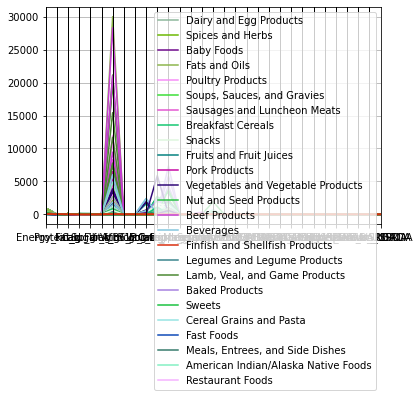

In [164]:
pd.plotting.parallel_coordinates(ex1_dropped,'FoodGroup')

# ทำ PCA 

In [132]:
from sklearn.decomposition import PCA

In [133]:
pca = PCA(n_components=2)

In [134]:
new_pca = pca.fit_transform(new_ex1_drop.to_numpy())

In [135]:
new_pca.shape

(8618, 2)

In [142]:
FG= set(ex1['FoodGroup'])
FG

{'American Indian/Alaska Native Foods',
 'Baby Foods',
 'Baked Products',
 'Beef Products',
 'Beverages',
 'Breakfast Cereals',
 'Cereal Grains and Pasta',
 'Dairy and Egg Products',
 'Fast Foods',
 'Fats and Oils',
 'Finfish and Shellfish Products',
 'Fruits and Fruit Juices',
 'Lamb, Veal, and Game Products',
 'Legumes and Legume Products',
 'Meals, Entrees, and Side Dishes',
 'Nut and Seed Products',
 'Pork Products',
 'Poultry Products',
 'Restaurant Foods',
 'Sausages and Luncheon Meats',
 'Snacks',
 'Soups, Sauces, and Gravies',
 'Spices and Herbs',
 'Sweets',
 'Vegetables and Vegetable Products'}

#สร้าง Dictionary เพื่อแทนค่าที่เป็น text ให้เป็นตัวเลข เพื่อจะได้ plot สีได้ 

In [165]:
color_list = {}
num = 0
for each_fg in FG:
     if each_fg not in color_list:
       color_list[each_fg] = num
       num += 1 
  

In [166]:
color_list

{'American Indian/Alaska Native Foods': 12,
 'Baby Foods': 7,
 'Baked Products': 0,
 'Beef Products': 15,
 'Beverages': 23,
 'Breakfast Cereals': 17,
 'Cereal Grains and Pasta': 10,
 'Dairy and Egg Products': 8,
 'Fast Foods': 16,
 'Fats and Oils': 4,
 'Finfish and Shellfish Products': 19,
 'Fruits and Fruit Juices': 22,
 'Lamb, Veal, and Game Products': 1,
 'Legumes and Legume Products': 2,
 'Meals, Entrees, and Side Dishes': 20,
 'Nut and Seed Products': 13,
 'Pork Products': 6,
 'Poultry Products': 18,
 'Restaurant Foods': 5,
 'Sausages and Luncheon Meats': 21,
 'Snacks': 14,
 'Soups, Sauces, and Gravies': 9,
 'Spices and Herbs': 3,
 'Sweets': 11,
 'Vegetables and Vegetable Products': 24}

## แทนค่า text ใน dictionary ด้วยตัวเลขที่กำหนด

In [167]:
ex1_dropped2 = ex1_dropped.replace(color_list)

In [168]:
ex1_dropped2

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,8,717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.17,0.0,3,24,0.000,0.02,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,8,717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.13,0.0,3,24,0.016,0.16,0.004,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,8,876,0.28,99.48,0.00,0.00,0.0,840,0.001,0.01,0.0,0,4,0.001,0.00,0.000,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,8,353,21.40,28.74,2.34,0.50,0.0,198,0.166,1.22,0.0,36,528,0.040,0.31,0.009,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,8,371,23.24,29.68,2.79,0.51,0.0,292,0.065,1.26,0.0,20,674,0.024,0.43,0.012,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,19,305,18.50,25.10,0.00,0.00,0.0,47,0.410,12.00,0.0,15,66,0.100,1.40,0.000,73.4,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,19,111,20.54,0.84,5.41,0.00,0.0,2,0.112,2.15,0.0,20,10,0.033,0.58,0.029,21.7,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,11,269,0.00,0.00,73.14,73.20,0.0,0,0.000,0.00,0.0,0,13,0.020,3.60,0.000,0.7,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,19,90,16.10,1.40,2.00,0.00,0.0,30,0.130,0.50,0.0,6,10,0.400,3.50,0.000,27.4,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


**plot  กราฟ scatter**

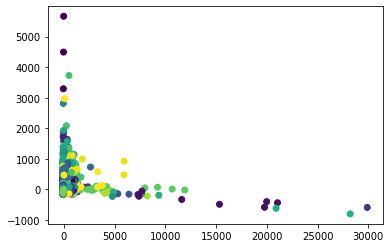

In [170]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = ex1_dropped2['FoodGroup'])

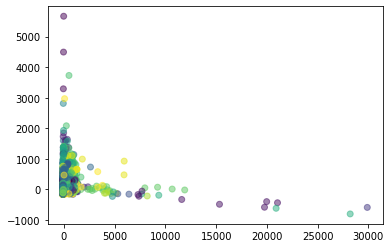

In [171]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = ex1_dropped2['FoodGroup'],alpha=0.5)